In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

# Seaborn library is used for generating visualizations and is based on matplotlib
import seaborn as sns

In [18]:
df=pd.read_csv('F:/imarticus/imarticus machine learning---lms/random forest/Taxi Fare Prediction/Dataset/taxifare.csv')

In [19]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [20]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [21]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [22]:
df.describe(include='object')

,unique_id,date_time_of_pickup
count,50000,50000
unique,3597,49555
top,26:00.0,2014-05-30 23:38:00 UTC
freq,457,3


In [23]:
df.describe(exclude='object')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [24]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [25]:
df.no_of_passenger

0        1
1        1
2        2
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    2
49999    1
Name: no_of_passenger, Length: 50000, dtype: int64

In [26]:
df=df.drop(['unique_id','date_time_of_pickup'],axis=1)

In [27]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2


In [28]:
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  6
Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')
Number of Categorical features:  0
Index([], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

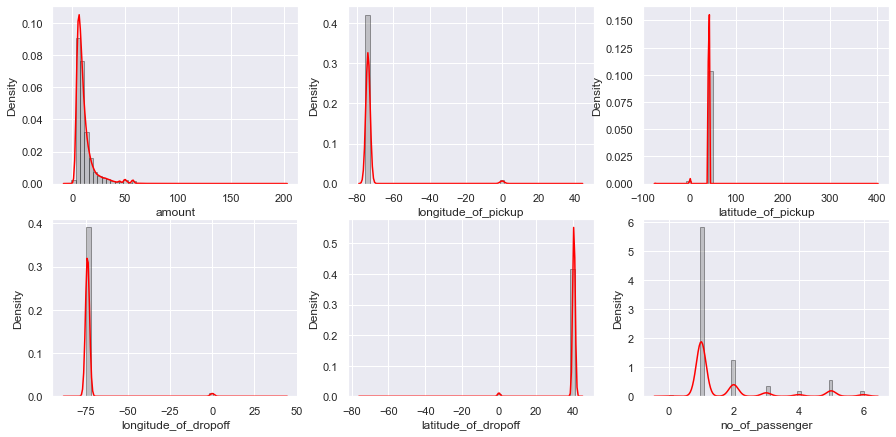

In [29]:
# Ques 1 c) Show distribution of the numerical columns
sns.set()
fig = plt.figure(figsize = [15, 15])

# Specifying the columns
cols = ['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']
count = 1

# Generating the plots
for col in cols :
    plt.subplot(4,3,count)
    sns.distplot(df[col],hist_kws = dict(edgecolor = "k", linewidth = 1,color = 'grey'), color = 'red')
    count+=1
plt.show() 

# independent and dependent variable

In [13]:
x=df.drop(['no_of_passenger'],axis=1)
y=df.no_of_passenger

# train_test_split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

# RandomForest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf=RandomForestClassifier()

In [18]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred1=rf.predict(x_test)

In [20]:
print(y_pred1.shape)
print(y_pred1[0:5])

(15000,)
[1 1 1 1 1]


In [21]:
from sklearn import metrics

In [22]:
print('Accuracy using RF',metrics.accuracy_score(y_test,y_pred1))


Accuracy using RF 0.6876666666666666


In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.metrics import classification_report
Prediction = rf.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(Prediction)

[1 1 1 ... 1 1 1]


In [26]:
print(Score)

0.6876666666666666


In [27]:
print(Report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.69      0.99      0.82     10417
           2       0.12      0.01      0.01      2244
           3       0.00      0.00      0.00       654
           4       0.00      0.00      0.00       311
           5       0.05      0.00      0.00      1019
           6       0.00      0.00      0.00       304

    accuracy                           0.69     15000
   macro avg       0.12      0.14      0.12     15000
weighted avg       0.50      0.69      0.57     15000



# kfold cross valiadation to evalute the performance

In [28]:
from sklearn.model_selection import KFold
from sklearn import tree
ld=RandomForestClassifier()# create a linear regression object
kfold_validation=KFold(5)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
result2=cross_val_score(ld,x,y,cv=kfold_validation)
print(result2)
print(np.mean(result2))

[0.7005 0.6892 0.6817 0.6941 0.6854]
0.69018


In [29]:
from sklearn.model_selection import KFold
from sklearn import tree
ld=RandomForestClassifier()# create a linear regression object
kfold_validation=KFold(10)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
result2=cross_val_score(ld,x,y,cv=kfold_validation)
print(result2)
print(np.mean(result2))

[0.7028 0.697  0.6992 0.6776 0.674  0.6874 0.6996 0.6922 0.6894 0.6878]
0.6907


# RandomizedSearchCV

In [30]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [31]:
# create function to generate model report
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1: .3f})'.format(results['mean_test_score'][candidate],
                                                                           results['std_test_score'][candidate]))
            print('Parameters: {0}'.format(results['params'][candidate]))
            print("")

In [ ]:
param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]}

In [33]:
n_iter_search=20
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [34]:
start=time()
random_search.fit(x_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter setting.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 2276.94 seconds for 20 candidatesparameter setting.
Model with rank: 1
Mean validation score:  0.697 (std:  0.000)
Parameters: {'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': 80, 'bootstrap': True}

Model with rank: 2
Mean validation score:  0.697 (std:  0.000)
Parameters: {'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': 110, 'bootstrap': True}

Model with rank: 3
Mean validation score:  0.697 (std:  0.000)
Parameters: {'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': 90, 'bootstrap': True}



# hyperparameter tuning to build 1 model

In [35]:
# Ques 5) Build a random forest classifier
# Creating a random forest classifier
clf_rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', 
                                min_samples_split = 10, min_samples_leaf = 9, max_features = "auto",
                                random_state = 500, max_depth = 12) 

In [36]:
# Training the model 
clf_fit = clf_rf.fit(x_train, y_train) 

# Predicting the quality
y_pred = clf_fit.predict(x_test)

In [37]:
# Checking the accuracy of the model
accuracy_score(y_test, y_pred)

0.6944666666666667

In [38]:
# Predicting the probabilities of wine being of high quality
y_proba = clf_fit.predict_proba(x_test)

In [39]:
y_proba

array([[0.00574019, 0.7654633 , 0.08699115, ..., 0.00981788, 0.06745042,
        0.00809281],
       [0.00294207, 0.71586579, 0.13953308, ..., 0.01860863, 0.05863634,
        0.0228523 ],
       [0.00240836, 0.72603123, 0.12357672, ..., 0.02077272, 0.06811869,
        0.01496112],
       ...,
       [0.00201042, 0.68505535, 0.15230561, ..., 0.02219445, 0.07078607,
        0.02351755],
       [0.00434513, 0.68680543, 0.14771246, ..., 0.0137406 , 0.0974263 ,
        0.01358172],
       [0.00212453, 0.56010906, 0.21876313, ..., 0.0472335 , 0.03827083,
        0.03931912]])

In [40]:
# Visualizing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[    0    51     0     0     0     0     0]
 [    0 10417     0     0     0     0     0]
 [    0  2244     0     0     0     0     0]
 [    0   654     0     0     0     0     0]
 [    0   311     0     0     0     0     0]
 [    0  1019     0     0     0     0     0]
 [    0   303     1     0     0     0     0]]


# hyperparameter tunning..to build 2 model

In [41]:
# Again creating a random forest classifier
clf_rf2 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', 
                                min_samples_split = 2, min_samples_leaf = 5, max_features = "auto",
                                random_state = 100, max_depth = 3) 

In [42]:
# Training the model 
clf_fit_2 = clf_rf2.fit(x_train, y_train) 

# Predicting the quality 
y_pred_2 = clf_fit_2.predict(x_test) 

In [43]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_2)

0.6944666666666667

We can see here that by changing the values of the parameter, there is a slight increase in the accuracy. 
Though the increase is not significant as the value only improved by 0.1, in the first model accuracy was 0.69 and 
now the accuracy is 0.69 Earlier we were using 'Entropy' as criterion, now we are using 'Gini' as criterion, 
the max depth of the tree has been decreased and so on. Similarly, we can keep on tuning the parameters,
to obtain the highest accuracy